### 복습

In [2]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

In [16]:
src = cv2. imread('./fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

if src is None:
    print('image read failed')
    sys.exit()

# b, g, r = cv2.split(src)
# b = src[:, :, 0]
# g = src[:, :, 0]
# r = src[:, :, 0]

h, s, v = cv2.split(src_hsv)
v_blr = cv2.GaussianBlur(v, (0,0), 3) # v만
src_raw = cv2.GaussianBlur(src, (0,0), 3) # 원본 통째로
src_blur = cv2.merge((h, s, v_blr))
src_blur = cv2.cvtColor(src_blur, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
# cv2.imshow('src', src_hsv)

cv2.imshow('src_blur', src_blur)
cv2.imshow('src_raw', src_raw)
# cv2.imshow('b', b)
# cv2.imshow('g', g)
# cv2.imshow('r', r)
# cv2.imshow('h', h)
# cv2.imshow('s', s)
# cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)

bitwise_and = cv2.bitwise_and(src1, src2)
bitwise_or = cv2.bitwise_or(src1, src2)
bitwise_xor = cv2.bitwise_xor(src1, src2)
bitwise_not = cv2.bitwise_not(src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('bitwise_and', bitwise_and)
cv2.imshow('bitwise_or', bitwise_or)
cv2.imshow('bitwise_xor', bitwise_xor)
cv2.imshow('bitwise_not', bitwise_not)


cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros_like(src1, np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 100, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.)
dst3 = cv2.subtract(src2, src1)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
import time

In [28]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)

tm = cv2.TickMeter()
tm.start()

t1 = time.time()

for _ in range(100):
    cv2.GaussianBlur(src1, (0,0), 5)

t2 = time.time()
tm.stop()

print(f'{(t2 - t1)*1000} ms')
print(f'{tm.getTimeMilli()} ms')

58.7315559387207 ms
58.8123 ms


In [33]:
def call_trackbar(pos):
    src[:] = (src2/255.) * pos
    cv2.imshow('src', src)

src = cv2.imread('./fig/puppy.bmp', 0)
src2 = src.copy()

cv2.imshow('src', src)
cv2.createTrackbar('level', 'src', 0, 255, call_trackbar)

cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
def call_mouse(event, x, y, flags, param):
    global old_x, old_y
    if event == cv2.EVENT_LBUTTONDOWN:
        old_x, old_y = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(src, (old_x, old_y), (x, y), (255, 0, 0), 1, cv2.LINE_AA)
            cv2.imshow('src', src)
            old_x, old_y = x, y


src = np.zeros((600,600,3), np.uint8) + 255

cv2.imshow('src', src)
cv2.setMouseCallback('src', call_mouse)

cv2.waitKey()
cv2.destroyAllWindows()b

In [40]:
src = cv2.imread('./fig/puppy.bmp', 0)

cv2.imshow('src', src)

while True:
    key = cv2.waitKey()

    if key == 27:
        break
    elif key == ord('i'):
        src = 255 - src
        cv2.imshow('src', src)
    elif key == ord('e'):
        src = cv2.Canny(src, 50, 100)
        cv2.imshow('src', src)

cv2.destroyAllWindows()

In [42]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS) * 0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

output = cv2.VideoWriter('video.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()

    if not ret:
        print('frame read failed')
        break
    output.write(frame)
    cv2.imshow('frame', frame)

    if cv2.waitKey(20) == 27:
        break

cap.release()
output.release()
cv2.destroyAllWindows()

In [54]:
src = np.full((600,1200,3), (0, 255, 255), np.uint8)

cv2.line(src, (50,100), (200, 100), (0, 0, 255), 10, cv2.LINE_AA)
cv2.arrowedLine(src, (50, 150), (200, 150), (0, 255, 0), 10, cv2.LINE_AA)
cv2.rectangle(src, (50,300), (200, 500), (255, 0, 0), -1, cv2.LINE_AA)
cv2.rectangle(src, (70, 320, 110, 160), (0, 255, 0), 10 )
cv2.circle(src, (400, 300), 100, (255,255,0), -1, cv2.LINE_AA)
cv2.ellipse(src, (600, 300), (50, 100), -10, 0, 360, (120, 120, 120), 10, cv2.LINE_AA) # 타원형
cv2.putText(src, 'I want to go home', (500, 100), cv2.FONT_HERSHEY_TRIPLEX, 2, (100, 150, 100), 1, cv2.LINE_AA)

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

In [59]:
src = cv2.imread('./fig/ch2_fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED) # 알파채널 읽을 때
src = cv2.resize(src, (400, 600), interpolation=cv2.INTER_AREA)

img = src[:,:,:-1]
mask = src[:,:,-1]

cv2.imshow('img', img)
cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [62]:
src = cv2.imread('./fig/ch2_fig/cow.png')
dst = cv2.imread('./fig/ch2_fig/green.png')

# mask 없는 영상 mask 만들기
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# dst 크기가 다르기 때문에 crop
h, w = src.shape[:2]
crop = dst[300:300+h, 300:300+w]

cv2.copyTo(src, mask, crop)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [63]:
import os

In [66]:
img_lists = os.listdir('./fig/images/')

img_paths = []
for i in img_lists:
    img_paths.append('./fig/images/' + i)

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

idx = 0

while True:
    img = cv2.imread(img_paths[idx])

    if img is None:
        print('image read failed')
        break

    cv2.imshow('scene', img)

    idx += 1

    if idx >= len(img_paths):
        idx = 0

    if cv2.waitKey(2000) == 27:
        break
cv2.destroyAllWindows()
# print(img_paths)
# print(img_lists)

### 영상의 히스토그램(흑백)

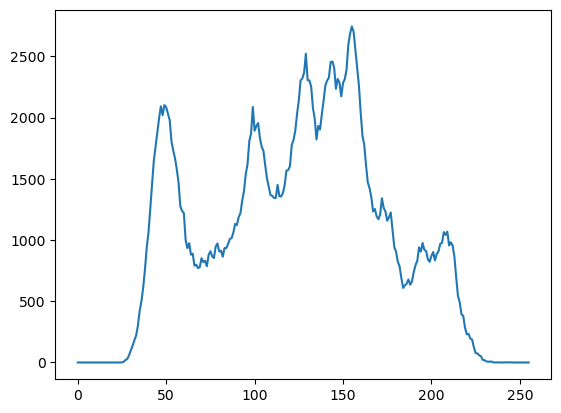

In [71]:
src = cv2.imread('./fig/lenna.bmp', 0)

hist = cv2.calcHist([src], [0], None, [256], [0,256])

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

plt.plot(hist)
plt.show()

### 영상의 히스토그램 (컬러)

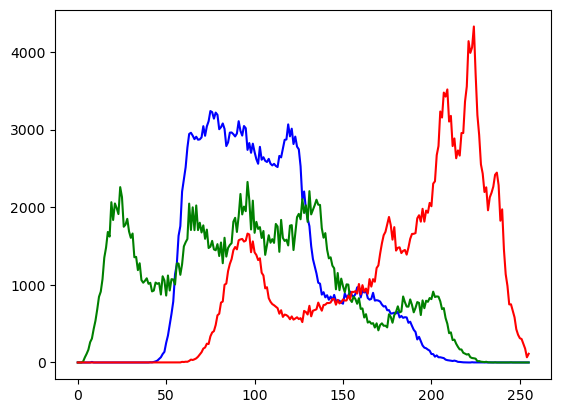

In [73]:
src = cv2.imread('./fig/lenna.bmp')

hist_b = cv2.calcHist([src], [0], None, [256], [0,256])
hist_g = cv2.calcHist([src], [1], None, [256], [0,256])
hist_r = cv2.calcHist([src], [2], None, [256], [0,256])

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

plt.plot(hist_b, c='b')
plt.plot(hist_g, c='g')
plt.plot(hist_r, c='r')
plt.show()

### OpenCV를 이용한 히스토그램

In [83]:
def getGrayHistImage(hist):
    imgHist = np.full((200, 256, 3), (255, 255, 255), dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 200)
        pt2 = (x, 200 - int(hist[x, 0] * 200 / histMax))
        cv2.line(imgHist, pt1, pt2, (0, 0, 255))

    return imgHist


src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()

In [111]:
src = cv2.imread('./fig/ch2_fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)
src = cv2.resize(src,(250, 180), interpolation=cv2.INTER_AREA)
src2 = src.copy()

idx = 0

while True:
    src_img = src[:,:,:-1] # 알파채널 빼고 읽기
    src_mask = src[:,:,-1] # 알파채널만 읽기

    jihoon = cv2.imread('./fig/ch2_fig/KakaoTalk_20230215_153205813.png')
    h, w = src.shape[:2]
    crop = jihoon[40:40+h, 160:160+w]

    cv2.copyTo(src_img,src_mask,crop)

    if img is None:
        print('image read failed')
        break

    src[:] = (src2/255.) * idx
    cv2.imshow('jihoon', jihoon)


    idx += 20
    # print(idx)

    if idx >= 255:
        # break
        idx = 0

    if cv2.waitKey(100) == 27:
        break
cv2.destroyAllWindows()


### 알파값 변경하면서 저장하기 실습

In [113]:
src = cv2.imread('./fig/ch2_fig/KakaoTalk_20230215_153205813.png')
glass = cv2.imread('./fig/ch2_fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)
glass = cv2.resize(glass, (250, 280), interpolation=cv2.INTER_AREA)

src_copy = src.copy()

glass_ = glass[:,:,:-1]
mask = glass[:,:,-1]

src_crop = src[0:0+280, 140:140+250]
cv2.copyTo(glass_, mask, src_crop)

h, w = src.shape[:2]
fps = 20
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

output = cv2.VideoWriter('my_sunglasses.avi', fourcc, fps, (w, h))

cv2.imshow('src', src)
# cv2.imshow('glass', glass)
# cv2.imshow('mask', mask)
cv2.imshow('src_copy', src_copy)

for i in range(100):
    alpha = i * 0.01
    dst = cv2.addWeighted(src, alpha, src_copy, 1-alpha, 0.)

    output.write(dst)

    cv2.imshow('dst', dst)



    if cv2.waitKey(100) == 27:
        break
    if i == 99:
        cv2.waitKey()
output.release()
cv2.destroyAllWindows()

### 히스토그램 변환 (흑백)

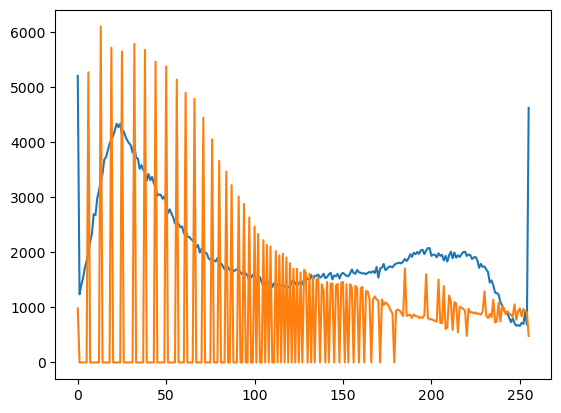

In [149]:
src = cv2.imread('./fig/manjang.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_2)

# hist = cv2.calcHist([src], [0], None, [256], [0, 256])

# # 1. Normalization
# Imin, Imax, _, _ = cv2.minMaxLoc(src)

# value = (src - Imin)*255 / (Imax - Imin)
# dst = np.clip(value, 0, 255).astype(np.uint8)
# print(dst.dtype)

# 2. Normalization(OpenCV)
dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_equal = cv2.equalizeHist(src)
dst_hist = cv2.calcHist([dst_equal], [0], None, [256], [0, 256])


plt.plot(hist)
plt.plot(dst_hist)
plt.show()

cv2.imshow('src', src)
# cv2.imshow('dst', dst)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 변환(칼라)

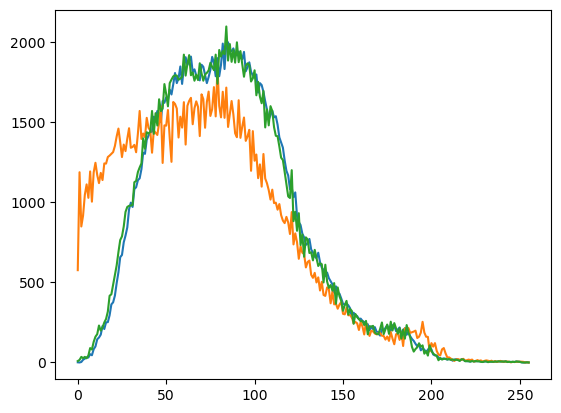

In [162]:
src = cv2.imread('./fig/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_8)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(src_hsv)
# print(h, s, v)

# 1. equaliaziton
v_equal = cv2.equalizeHist(v)
dst_equal = cv2.merge((h, s, v_equal))
dst_equal = cv2.cvtColor(dst_equal, cv2.COLOR_HSV2BGR)

# 2. normaliazation
v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_norm = cv2.merge((h, s, v_norm))
dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR)

# 3. histogram
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_equal = cv2.calcHist([dst_equal], [0], None, [256], [0, 256])
hist_norm = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])

plt.plot(hist)
plt.plot(hist_equal)
plt.plot(hist_norm)
plt.show()


cv2.imshow('src', src)
cv2.imshow('dst_equal', dst_equal)
cv2.imshow('dst_norm', dst_norm)

cv2.waitKey()
cv2.destroyAllWindows()

### 특정 색상 영역 찾아내기

In [195]:
src = cv2.imread('./fig/palette.png')
# src = cv2.imread('./fig/palette_dark.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100)) # green 을 뽑는다
# dst2 = cv2.inRange(src_hsv, (40, 100, 0), (80, 255, 255)) # green 을 뽑는다
dst2 = cv2.inRange(src_hsv, (110, 100, 0), (130, 255, 255)) # blue 을 뽑는다

cv2.imshow('src', src)
# cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

### 트랙바를 이용해서 색상 찾기

In [219]:
src = cv2.imread('./fig/palette.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

def call_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'ctrl')
    hmax = cv2.getTrackbarPos('H_max', 'ctrl')
    smin = cv2.getTrackbarPos('S_min', 'ctrl')
    smax = cv2.getTrackbarPos('S_max', 'ctrl')
    vmin = cv2.getTrackbarPos('V_min', 'ctrl')
    vmax = cv2.getTrackbarPos('V_max', 'ctrl')

    dst = cv2.inRange(src_hsv, (hmin, smin, vmin), (hmax, smax, vmax))
    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.namedWindow('ctrl')

cv2.createTrackbar('H_min', 'ctrl', 0, 179, call_trackbar)
cv2.createTrackbar('H_max', 'ctrl', 100, 179, call_trackbar)

cv2.createTrackbar('S_min', 'ctrl', 0, 255, call_trackbar)
cv2.createTrackbar('S_max', 'ctrl', 255, 255, call_trackbar)

cv2.createTrackbar('V_min', 'ctrl', 0, 255, call_trackbar)
cv2.createTrackbar('V_max', 'ctrl', 255, 255, call_trackbar)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
